In [9]:
#training our convnet on a smaller dataset.
import os
import shutil

In [57]:
og_dataset_dir = '/home/anshul/Desktop/Deep_Learning/Dogs_vs_Cats/dogs-vs-cats/train'
#new dir to store smaller dataset
base_dir = '/home/anshul/Desktop/Deep_Learning/Dogs_vs_Cats/Smaller_Img_Dataset'
os.mkdir(base_dir)
#dirs to store train,val,test datsets
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

val_dir = os.path.join(base_dir,'validation')
os.mkdir(val_dir)
#making the individual datasets in those new dirs
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
val_cats_dir = os.path.join(val_dir,'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir,'dogs')
os.mkdir(val_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#copy first 1000 cat imgs to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: 
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
#copy next 500 cat imgs to val_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames: 
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src,dst)
#copy next 500 cat imgs to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames: 
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
#same for the dogs
fnames = ['dog.{}.jpg'.format(j) for j in range(1000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copy(src,dst)
fnames = ['dog.{}.jpg'.format(j) for j in range(1000,1500)]
for fname in fnames:
    src = os.path.join(og_dataset_dir,fname)
    dst = os.path.join(val_dogs_dir,fname)
    shutil.copy(src,dst)
fnames = ['dog.{}.jpg'.format(j) for j in range(1500,2000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copy(src,dst)

In [58]:
#sanity check
print('dog training imgs = ', len(os.listdir(train_dogs_dir)))
print('dog val imgs = ', len(os.listdir(val_dogs_dir)))
print('dog test imgs = ', len(os.listdir(test_dogs_dir)))
#same will happen for dogs

dog training imgs =  1000
dog val imgs =  500
dog test imgs =  500


In [59]:
#builiding our network, same old convnet2d and maxpooling story
#since our dataset is larger we need it to be of more depth
#input shape will be (150,150,3) 150 is arbitrary, 3 is RGB.
#feature map depth inc from 32 to 128, and its size dec from 148X148 to 7X7.(prominent pattern)
from keras import layers
from keras import models

In [60]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
#binary classification, cat OR dog, use sigmoid activation function
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 128)      

In [61]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [62]:
#data preprocessing for Image dataset.
#read jpeg files as rgb grids of pixels
#convert these grids to 1D tensor
#one hot encode by dividing it by 255
#use ImgDataGenerator from keras to do this 
from keras.preprocessing.image import ImageDataGenerator

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150), #resizes imgs to 50 50. 
                        batch_size=20,
                        class_mode='binary'
                        )
#python generators directly turn img files to tensors.

Found 2000 images belonging to 2 classes.


In [114]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
63


In [65]:
#we fit generators using fit.generator

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,#batch size*steps_per_epoch must be = train_gen size
        epochs=30,
        validation_data=val_generator,
        validation_steps=50
    )

Epoch 1/30


/tmp/ipykernel_5359/1511062240.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 6s 48ms/step - loss: 0.6930 - acc: 0.5160 - val_loss: 0.6859 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6763 - acc: 0.5550 - val_loss: 0.6631 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6503 - acc: 0.6180 - val_loss: 0.6411 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6056 - acc: 0.6635 - val_loss: 0.6164 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 5s 47ms/step - loss: 0.5719 - acc: 0.6895 - val_loss: 0.6830 - val_acc: 0.6090
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5517 - acc: 0.7205 - val_loss: 0.6913 - val_acc: 0.6240
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5300 - acc: 0.7290 - val_loss: 0.6025 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 5s 47ms/step - loss: 0.516

In [66]:
model.save('cats_and_dogs_small_1.h5')

In [67]:
#curves of loss and accuracy during training
import matplotlib.pyplot as plt

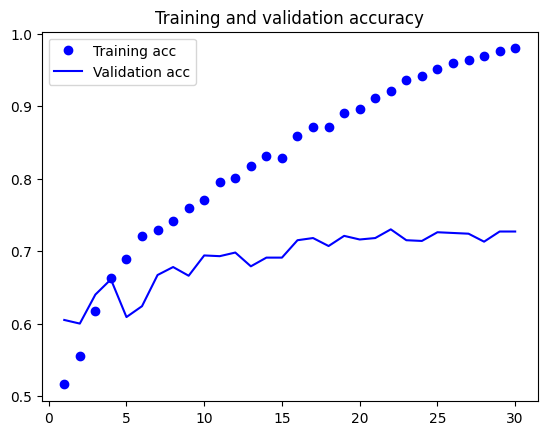

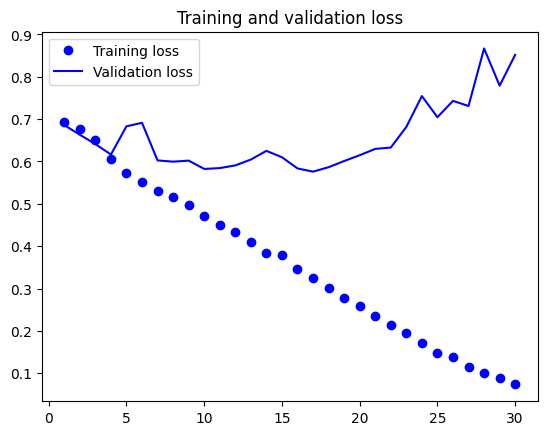

In [74]:
acc = history.history['acc'] #gives train acc as array
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [72]:
#graphs imply a case of OVERFITTING
#since we have a smaller train samples (2000), overfitting is our #1 concern
#we can use DROPOUT layers, but for Computer Vision, we can use DATA AUGMENTATION
#DA generates more training data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

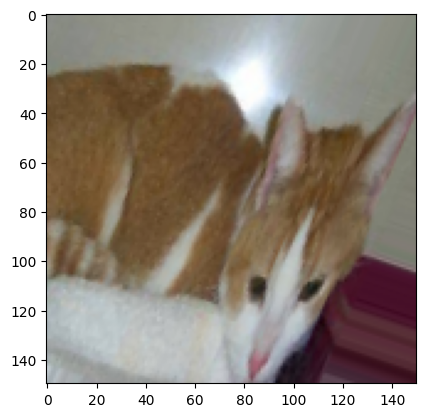

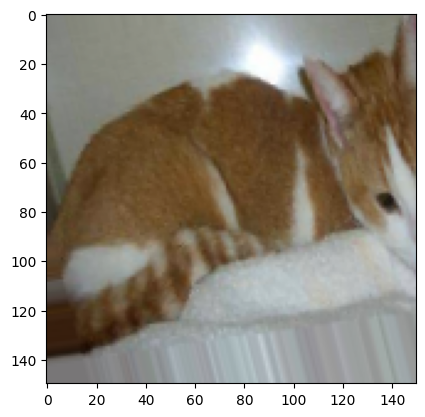

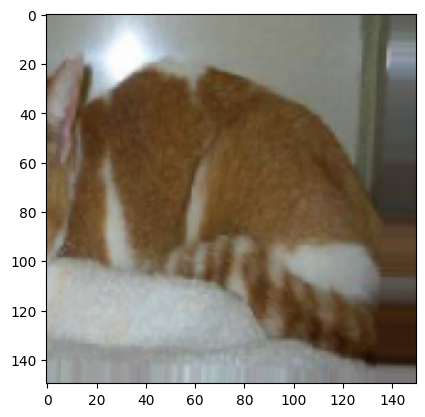

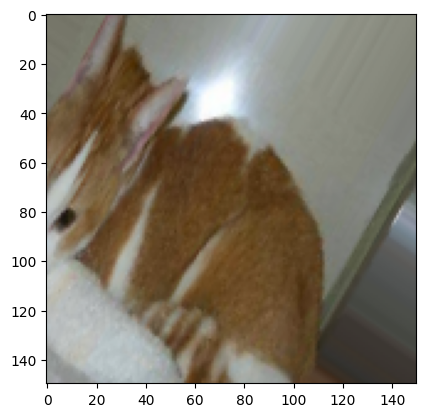

In [98]:
#generating a cat pic via augmentation
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for
         fname in os.listdir(train_cats_dir)]
#array of all cat img names

img_path = fnames[599]

img = image.load_img(img_path, target_size=(150,150)) #reads img and resizes it to this\

x = image.img_to_array(img) #convts to array with shape 150,150,3
#print(x)
x = x.reshape((1,) + x.shape) #conv to 1,150,150,3
#print(x)
i=0
#gens bacthes of randomly augmn imgs
for batch in datagen.flow(x,batch_size=1): #flow gens batches of augm data
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if i%4==0:
        break

plt.show()

In [116]:
#we train a new model that uses augmentation and dropout layer
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #regularization
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc']
             )
#training our convnet
#augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
#dont augment validation data lmao

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=val_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/tmp/ipykernel_5359/3234974606.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 9s 87ms/step - loss: 0.6958 - acc: 0.4955 - val_loss: 0.6885 - val_acc: 0.5160
Epoch 2/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6919 - acc: 0.5270 - val_loss: 0.6826 - val_acc: 0.5270
Epoch 3/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6841 - acc: 0.5600 - val_loss: 0.6674 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6780 - acc: 0.5680 - val_loss: 0.6651 - val_acc: 0.5790
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6701 - acc: 0.5875 - val_loss: 0.7163 - val_acc: 0.5240
Epoch 6/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6620 - acc: 0.5860 - val_loss: 0.6487 - val_acc: 0.5960
Epoch 7/100
100/100 [==============================] - 9s 91ms/step - loss: 0.6572 - acc: 0.5975 - val_loss: 0.6335 - val_acc: 0.6150
Epoch 8/100
100/100 [==============================] - 9s 90ms/step - loss

In [117]:
#got val_Acc = 80%, much more accurate than without augmentation
model.save('cats_and_dogs_small_2.h5')

/home/anshul/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


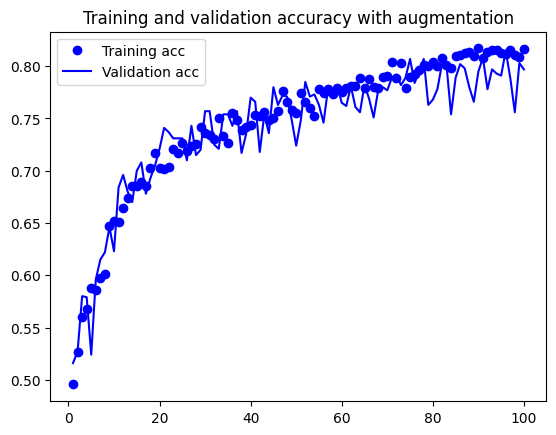

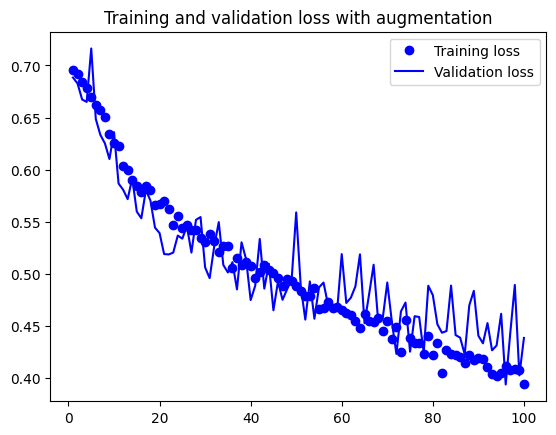

In [119]:
acc = history.history['acc'] #gives train acc as array
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy with augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss with augmentation')
plt.legend()
plt.show()

In [1]:
#VISUALIZING INTERMEDIATE ACTIVATIONS
from keras.models import load_model
model=load_model('cats_and_dogs_small_2.h5')
model.summary()

2023-12-25 11:43:57.631631: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 11:43:57.780467: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 11:43:57.781042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 17, 17, 128)     

In [3]:
#preprocessing a single image, not part of training
img_path = '/home/anshul/Desktop/Deep_Learning/Dogs_vs_Cats/Smaller_Img_Dataset/test/cats/cat.1592.jpg'
from keras.preprocessing import image
import numpy as np

In [4]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor = img_tensor/255.
print(img_tensor.shape)

(1, 150, 150, 3)


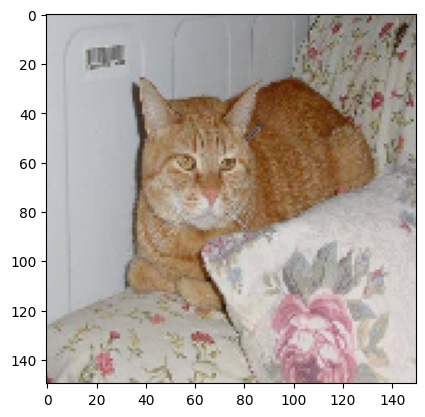

In [5]:
#displaying the test picture
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0]) #basically a 150 150 3 img
plt.show()

In [14]:
from keras import models
#extract outputs of top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
#creates a model that returns these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
#When fed an image input, this model returns the values of the layer activations in the
#original model
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_79')>,
 <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_79')>,
 <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_80')>,
 <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_80')>,
 <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_81')>,
 <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_81')>,
 <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_82')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_82')>]

In [17]:
activation = activation_model.predict(img_tensor)
activation

1/1 [==============================] - 0s 14ms/step


[array([[[[0.04601568, 0.04001609, 0.        , ..., 0.06755362,
           0.        , 0.13592857],
          [0.04596496, 0.03927652, 0.        , ..., 0.06656178,
           0.        , 0.13665305],
          [0.04527766, 0.03834958, 0.        , ..., 0.06842109,
           0.        , 0.1387446 ],
          ...,
          [0.02212633, 0.04190677, 0.        , ..., 0.0274405 ,
           0.        , 0.06318199],
          [0.00943445, 0.        , 0.        , ..., 0.0204381 ,
           0.        , 0.05075891],
          [0.00896787, 0.02689951, 0.        , ..., 0.00876176,
           0.        , 0.03577245]],
 
         [[0.04612242, 0.03932141, 0.        , ..., 0.06799779,
           0.        , 0.13698222],
          [0.04660985, 0.04078276, 0.        , ..., 0.0680309 ,
           0.        , 0.13778818],
          [0.04611984, 0.03784832, 0.        , ..., 0.06958469,
           0.        , 0.13949582],
          ...,
          [0.01264907, 0.0215395 , 0.        , ..., 0.03288627,
   

In [18]:
print(activation[0].shape)
#this is the first layer activation

(1, 148, 148, 32)


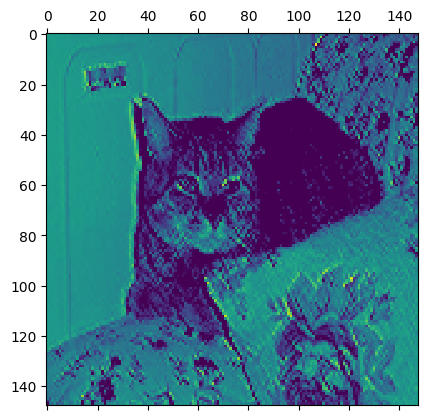

In [28]:
import matplotlib.pyplot as plt
first_layer_actv = activation[0]
#sixth channel of the first layer
plt.matshow(first_layer_actv[0, :, :, 6], cmap='viridis')
#The first layer acts as a collection of various edge detectors. At that stage, the
#activations retain almost all of the information present in the initial picture.
#this channel encodes outline of the cat.

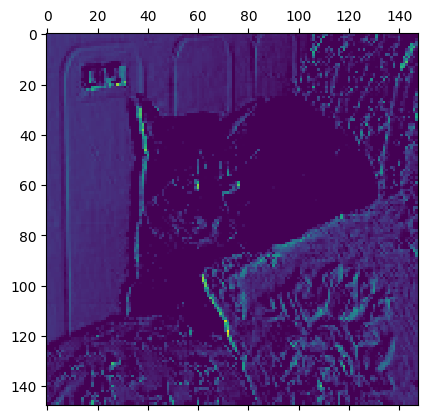

In [38]:
plt.matshow(first_layer_actv[0, :, :, 15], cmap='viridis')
#fifteenth channel of the first layer
#Higher presentations carry increasingly less information about the
#visual contents of the image, and increasingly more information related to the
#class of the image, for example this channel tries encoding cat ears and cushion edge